# $MNIST   DATA     SET $

In [26]:
import tensorflow as tf

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [29]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [30]:
print(x_train[0].shape)

(28, 28)


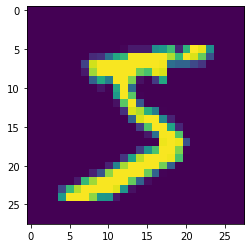

In [31]:
plt.imshow(x_train[0])

In [32]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0

In [33]:
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0
print(x_train[0].shape)

(784,)


In [34]:
#Sequential API 
Model=keras.Sequential(
        [
            keras.Input(shape=(28*28)),
            layers.Dense(512,activation='relu'),
            layers.Dense(256,activation='relu'),
            layers.Dense(128,activation='relu'),
            layers.Dense(64,activation='relu'),
            layers.Dense(10),
        ]
)
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
Model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy'],
)

In [36]:
Model.fit(x_train,y_train,batch_size=32,epochs=15,verbose=2)
Model.evaluate(x_test,y_test,batch_size=32,verbose=2)
Model.save('mnist_Ashish.h5')
print("Model saved")

Epoch 1/15
1875/1875 - 13s - loss: 0.3552 - accuracy: 0.9055
Epoch 2/15
1875/1875 - 12s - loss: 0.2233 - accuracy: 0.9455
Epoch 3/15
1875/1875 - 12s - loss: 0.1886 - accuracy: 0.9560
Epoch 4/15
1875/1875 - 11s - loss: 0.1924 - accuracy: 0.9568
Epoch 5/15
1875/1875 - 11s - loss: 0.1749 - accuracy: 0.9607
Epoch 6/15
1875/1875 - 11s - loss: 0.1783 - accuracy: 0.9608
Epoch 7/15
1875/1875 - 12s - loss: 0.1639 - accuracy: 0.9639
Epoch 8/15
1875/1875 - 11s - loss: 0.1548 - accuracy: 0.9654
Epoch 9/15
1875/1875 - 11s - loss: 0.2334 - accuracy: 0.9518
Epoch 10/15
1875/1875 - 11s - loss: 0.1865 - accuracy: 0.9614
Epoch 11/15
1875/1875 - 12s - loss: 0.1976 - accuracy: 0.9589
Epoch 12/15
1875/1875 - 11s - loss: 0.1715 - accuracy: 0.9633
Epoch 13/15
1875/1875 - 11s - loss: 0.1792 - accuracy: 0.9610
Epoch 14/15
1875/1875 - 12s - loss: 0.2185 - accuracy: 0.9517
Epoch 15/15
1875/1875 - 12s - loss: 0.2126 - accuracy: 0.9536
313/313 - 1s - loss: 0.2372 - accuracy: 0.9473
Model saved


In [12]:
def result(img):
        img=img.reshape(-1,28*28).astype("float32")/255.0
        p=Model.predict(img)
        p=p.flatten()
        maxi=0
        j=0
        i=0
        for i in range(0,10):
            if(maxi<p[i]):
                maxi=p[i]
                j=i       
        print("This Image is " +str(j))
        print(p)
           
                              
        

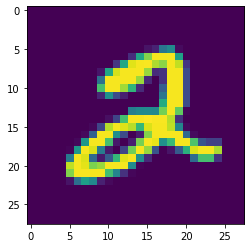

In [22]:
plt.imshow(x_train[5])

In [23]:
result(x_train[5])

This Image is 2
[  0.4483928    4.096168    12.15118      0.79119265  -0.44725338
  -5.8417773   -6.098239     5.2979755   -3.09441    -23.468513  ]


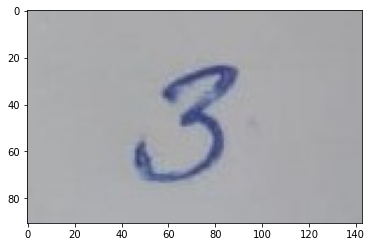

In [44]:
from PIL import Image
im = Image.open(r"C:\Users\ashish_s\OneDrive\Desktop\image_3.jpeg")  
plt.imshow(im) 

In [45]:
def Result(img):
    img=img.resize((28,28))
    img=img.convert('LA')
    img = np.asarray(img)
    img=img.reshape(-1,28*28).astype("float32")/255.0
    p=Model.predict([img])[0]
    maxi=0
    j=0
    i=0
    for i in range(0,10):
        if(maxi<p[i]):
            maxi=p[i]
            j=i 
    print(p)        
    print("This Image is " +str(j))
           

In [46]:
Result(im)

[-23.98673    11.642358   16.101152   21.905252   -6.0655556  14.459303
 -39.40998     8.433413   15.37852    11.629347 ]
This Image is 3
